<a href="https://colab.research.google.com/github/mohamedsennia/Introduction-to-Machine-Learning-Algorithms-Performance-Evaluation/blob/main/TP1_KPP_SVM_RNN_RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP1 réalisé par :
- LABCHRI Amayas

- KOULAL Yidhir Aghiles

- BAROUD Yasmine

- SENNIA Mouhamed

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy import random
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Pour RNC
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

#Lecture des fichiers de données à classifier
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
X = np.genfromtxt('/content/drive/MyDrive/IARN/TP1/data.csv', delimiter=',', dtype=int)
print(" Nombre d'exemplaires : ",X.shape[0] , " et le nombre le caractéristiques(features) est : ",X.shape[1])

 Nombre d'exemplaires :  5000  et le nombre le caractéristiques(features) est :  400


In [ ]:
# étiquettes
Y = np.genfromtxt('/content/drive/MyDrive/IARN/TP1/labels.csv', delimiter=',', dtype=int)
print("Le nombre d'étiquettes est : ",Y.shape[0])


Le nombre d'étiquettes est :  5000


##Les classes de notre dataset:

Changer le label de la classe 0

Les différentes classes de notre dataset

In [ ]:
Y[Y == 10] = 0

In [ ]:
np.unique(Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Affichage d'un exemple de notre dataset

Donnée[2222] :  [ 12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12
  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12
  12  12  12  12  12  12  12  12  12  12  12  12  12  12   6   3  11  12
  12  12  12  12  12  12  12  12  12  12  12  12  12  12  11   5  57  81
  13  11  12  12  12  12  12  12  12  12  12  12  12  12  12   7   7 117
 221 231 106   7  12  12  12  12  12  12  12  12  12  12  12  11   6  42
 124 229 249 247 188  20  11  12  12  12  12  12  12  12  12  12  11  14
  83 205 250 248 246 245 219  35   9  12  12  12  12  12  12  12  12  12
  10  18 137 215 193 154 171 249 223  54   8  12  12  12  12  12  12  12
  12  12  12  12   9  29   7   0  60 237 231  72   5  10  11  12  12  12
  12  12  12  12  12  12  11   7   8   4  29 196 240  89  14  20  17  12
  12  12  12  12  12  12  12   8   6  25  28  27  81 201 247 234 224 230
 167  22   9  12  12  12  11   7   7  46 107 180 185 186 239 241 242 245
 247 248 233  39   7  12  12  11  1

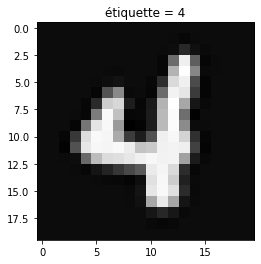

In [ ]:
print("Donnée[2222] : ",X[2222])
print("étiquette de donnée[2222] : ",Y[2222])
plt.title('étiquette = '+ str(Y[2222]))
plt.imshow(np.transpose(X[2222].reshape((20, 20))),cmap='gray')

## Afficher aléatoirement quelques données de notre base

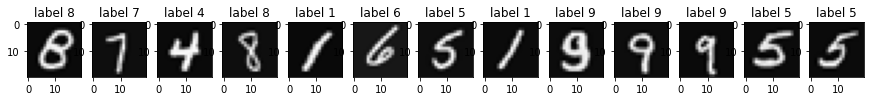

In [ ]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0]) #pich a random line from the dataset
    a = X[c,:].reshape((20, 20)) #shape of one number in the image
    a=np.transpose(a) # la transposé (rendre les ligne des colonne et vice versa)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(Y[c]))
    plt.imshow(a,cmap='gray')

# Implémentation des métriques

## Implementation de la matrice de confusion


In [ ]:
import seaborn as sns

# Methode pour calculer les VP et FP depuis la matrice de confusion pour une classe donnée
#la colonne 0 : VP
#la colonne 1 : FP
def mat_VP_FP(nbClasse,matConf):
  mat_vp_fp = np.zeros(shape=(nbClasse,2))
  for i in range(mat_vp_fp.shape[0]):
    mat_vp_fp[i][0]= matConf[i][i]
    mat_vp_fp[i][1] = np.sum(matConf[i:i+1]) - matConf[i][i]
  return mat_vp_fp
# Methode pour calculer les VP et NP depuis la matrice de confusion
def vp_np(mat_vp_fp,c):
  VP = mat_vp_fp[c][0]
  FP = mat_vp_fp[c][1]
  VN=0
  FN=0

  for i in range(mat_vp_fp.shape[0]):
    if(i != c):

      VN = VN + mat_vp_fp[i][0]
      FN = FN + mat_vp_fp[i][1]

  print("Pour la classe ",c)
  print("VP = ",VP," FP = ",FP," VN = ",VN," FN = ",FN)

  return VP,FP,VN,FN


# Methode pour la mtrice de confusion
def ConfusionMatrix(l1, l2):
  # Calculer le nombre de classe du dataset
  nbr_classe = len(np.unique(l1)) # retourn toutes les classe du dataset
  '''
    Creer un dictionnaire de la forme classe_num : valeur ; exemple 0 : 0 et 1:1
  '''

  label_index = dict(zip(np.unique(l1), np.arange(nbr_classe)))

  # Creer un tableau (matrice de confusion) ayant une dimension nbr_Classe * nbrr_Classe
  result = np.zeros((nbr_classe, nbr_classe))
  # Boucle de calcul
  for i in range(len(l1)):
    # Implementer le nombre de la case
    result[label_index[l1[i]]][label_index[l2[i]]] += 1

  return result



def AfficherMatriceConfusion(size_figure ,matrice_Confusion):
  # Définir la taille de la figure
  plt.figure(figsize=size_figure)
  # Introduire notre matrice de confusion
  ax = sns.heatmap(matrice_Confusion, annot=True, cmap='Reds')

  ax.set_title('Matrice de Confusion pour MNIST DIGITS CLASSIFICATION')
  ax.set_xlabel('\nValeurs predites')
  ax.set_ylabel('Valeurs réels ')

  ax.xaxis.set_ticklabels(['Vrai','Faux'])
  ax.yaxis.set_ticklabels(['Vrai','Faux'])

  plt.show()

## Rappel (sensibilité) :

In [ ]:
def rappel(VP,FN):
  r = VP / (VP+FN)
  return r

## Précision

In [ ]:
def precision(VP,FP):
  p = VP / (VP+FP)
  return p

## Taux de FP

In [ ]:
def taux_FP(FP,VP):
  t = FP / (FP+VP)
  return t


## Spécificité

In [ ]:
def specificite(VN,FP):
  s = VN / (VN + FP)
  return s

## implementation de la Courbe ROC

### Implementation d'une fonction de binarisation des probabilitées obtenu par chaque algorithme

In [ ]:
#Binariser le probleme(Le vecteur des proba) selon chaque classe
def bin_proba(pred_proba,c):
  proba = []
  for i in range(pred_proba.shape[0]):
    v = pred_proba[i]
    p1 = v[c]# prendre la probabilité de la classe qui nous interesse
    p2 = np.sum(v) - p1 # seul contre tous
    proba.append([p1,p2])
  return proba

###Courbe roc

In [ ]:
def ROC(vect_classe,seuils,y_test, y_proba):
  for k in range(vect_classes.shape[0]):
    # Pour chaque classe de 0  ->  9
    plt.figure(k)
    #binariser le vecteur des proba [classe[k], seul contre tous]
    classe = vect_classes[k]

    p=bin_proba(y_proba,classe)
    p=np.array(p)

    coord = []
    for i in range(seuils.shape[0]):
      #Pour chaque seuil
      VP=0
      FP=0
      VN=0
      FN=0
      for j in range(p.shape[0]):
        # si la probabilité de la classe k est superieur ou égale au seuil
        if(p[j][0] >= seuils[i]):
          #Si La verite terain est la meme que la classe alors c'est un vrai positif
          if(y_test[j] == classe):

            VP += 1
          else:
            #Si La verite terain n'est pas la meme que la classe alors c'est un faux positif
            FP += 1
        else:
          # si la probabilité de la classe k est inferieur au seuil
          if(y_test[j] != classe):
            #Si La verite terain est diff que la classe alors c'est un vrai négatif
            VN += 1
          else:
            #Si La verite terain est la meme que la classe alors c'est un faux négatif
            FN += 1
      # r==>rappel(sensibilité)   s==>specificite
      r = rappel(VP,FN)
      s = specificite(VN,FP)
      #Ajouter r et s a la liste des coordonnées
      coord.append([r,s])
    # Transformer la liste en vecteur
    coord = np.array(coord)
    # Afficher l'image
    plt.subplot(211)
    #Déssiner la courbe roc de la classe[k] (c-a-d  on aura a la fin 10 courbes ROC)
    plt.title('classe = '+ str(classe))
    plt.plot(1-coord[:,1],coord[:,0])
    plt.show()

# Classification des digits en utilisant pluisieurs algorithmes de classification :
* KNN
* SVM
* Les arbres de decision
* Réseaux de noeurones artificielles
* Réseaux de noeurones convolutifs


## Définir d'abord la base d'entrainement Xt, Yt et la base de test Xtt, Ytt.
Cela sera fait en divison notre base de données (dataset) selon un ratio choisit pour les données de test et les données d'entrainement

In [ ]:
tRatio=2/3 # ratio pour l'entrainement
ttRatio=1/3 # ratio pour le test
n = np.int32(X.shape[0])
m1=np.around(n * tRatio)
m2=np.around(n * ttRatio)
print("m1 = ",m1," et m2 = ",m2," et la somme = ",m1+m2)

Xt, Xtt, Yt, Ytt = train_test_split(X,Y,test_size = ttRatio, train_size=tRatio )
#Déssiner la courbe roc de la classe[k] (c-a-d  on aura a la fin 10 courbes ROC)
print("Xt = ", Xt.shape)
print("Xtt = ", Xtt.shape)
print("Yt = ", Yt.shape)
print("Ytt = ", Ytt.shape)



m1 =  3333.0  et m2 =  1667.0  et la somme =  5000.0
Xt =  (3333, 400)
Xtt =  (1667, 400)
Yt =  (3333,)
Ytt =  (1667,)


# Méthode 0: K- Plus Proches Voisins (KNN)

In [ ]:
import math
from collections import Counter
def distance_euclidienne(X, Y):
  s = 0
  for i in range(400):
    s = s + ((X[i]-Y[i])**2)
  return (s)**(1/2)

def distance_manhatthan(X,Y):
  s = 0
  for i in range(400):
    s = s + abs(Y[i] - X[i])
  return s
## KNN avec la distance euclidienne
def KNN(x,Xt,Yt,K):

  #creer et initialiser le vecteur des distance a -99 de taille K
  dist = [(-99) for i in range(K)]
  et = np.zeros_like(dist)
  #Calculer la distance entre x et toutes les autre data
  for k in range(len(Xt)):
    d = distance_euclidienne(Xt[k],x)

    j=0
    while(j<K):
      #Si y a encore de la place dans le vecteur des distances
      if(dist[j]== -99):
        dist[j]=d
        et[j]=Yt[k]
      else:
        j=j+1
    #Si le vecteur des distances est remplit completement alors on cherchre la distance maximal pour
    #la comparer avec la nouvelle distance calculée
    if(j==K):
      maxVal = np.max(dist)
      if(d<maxVal):
        i=0
        while(dist[i] != maxVal):
          i=i+1
        dist[i]=d
        et[i]=Yt[k]

  print("Le vecteur des distances : ",dist)
  print("Le vecteur des étiquettes : ",et)

  #chercher l'etiquette qui a le plus d'occurances
  arr = np.array(et)
  print("Le vecteur des etiquettes : ",arr)
  xx = np.argmax(np.bincount(arr))
  print("L'étiquette retournée par KNN est = :",xx)
  #Retournée cette étiquette
  #exemple : et={1,1,3} alors on retourne 1
  return xx
## KNN avec la distance de manhattan
def KNN_manatthan(x,Xt,Yt,K):

  #creer et initialiser le vecteur des distance a -99 de taille K
  dist = [(-99) for i in range(K)]
  et = np.zeros_like(dist)


  for k in range(len(Xt)):
    d = distance_manhatthan(Xt[k],x)


    j=0
    while(j<K):
      if(dist[j]== -99):
        dist[j]=d
        et[j]=Yt[k]
      else:
        j=j+1
    if(j==K):
      maxVal = np.max(dist)
      if(d<maxVal):
        i=0
        while(dist[i] != maxVal):
          i=i+1
        dist[i]=d
        et[i]=Yt[k]
        #print(Yt[k])
  print("Le vecteur des distances : ",dist)
  print("Le vecteur des étiquettes : ",et)

  #chercher l'etiquette qui a le plus d'occurances

  arr = np.array(et)

  xx = np.argmax(np.bincount(arr))

  print("L'étiquette retournée par KNN est = :",xx)
  return xx


## KNN avec la distance de Hamming
from scipy.spatial.distance import hamming
def KNN_hamming(x,Xt,Yt,K):

  #creer et initialiser le vecteur des distance a -99 de taille K
  dist = [(-99) for i in range(K)]
  et = np.zeros_like(dist)


  for k in range(len(Xt)):
    d = hamming(Xt[k],x)


    j=0
    while(j<K):
      if(dist[j]== -99):
        dist[j]=d
        et[j]=Yt[k]
      else:
        j=j+1
    if(j==K):
      maxVal = np.max(dist)
      if(d<maxVal):
        i=0
        while(dist[i] != maxVal):
          i=i+1
        dist[i]=d
        et[i]=Yt[k]
        #print(Yt[k])
  print("Le vecteur des distances : ",dist)
  print("Le vecteur des étiquettes : ",et)

  #chercher l'etiquette qui a le plus d'occurances

  arr = np.array(et)


  xx = np.argmax(np.bincount(arr))
  print("L'étiquette retournée par KNN est = : ",xx)
  return xx



## Quelques tests avec le model KNN pour deux images données

Le vecteur des distances :  [921.1199704707308, 0.0, 932.1807764591587, 835.494464374241, 817.876518797306]
Le vecteur des étiquettes :  [5 5 5 5 9]
Le vecteur des etiquettes :  [5 5 5 5 9]
L'étiquette retournée par KNN est = : 5
5


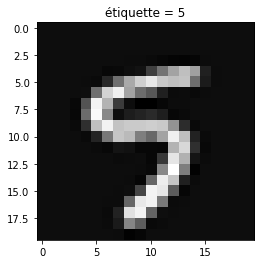

In [ ]:
#test du KNN
KNN(Xt[2],Xt,Yt,5)
print(Yt[2])
plt.title('étiquette = '+ str(Yt[2]))
plt.imshow(np.transpose(Xt[2].reshape((20, 20))),cmap='gray')




Le vecteur des distances :  [653.021439158011, 670.5221845696084, 682.1707997268719]
Le vecteur des étiquettes :  [0 0 0]
Le vecteur des etiquettes :  [0 0 0]
L'étiquette retournée par KNN est = : 0
0


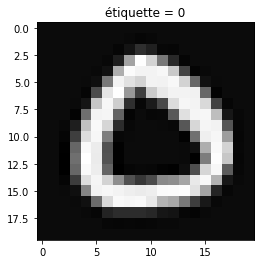

In [ ]:
KNN(Xtt[327],Xt,Yt,3)
print(Ytt[327])
plt.title('étiquette = '+ str(Ytt[327]))
plt.imshow(np.transpose(Xtt[327].reshape((20, 20))),cmap='gray')

## Le test de KNN en variant le K (le nombre de voisins)

## Application de KNN sur toute la base de données avec la distance euclidienne

In [ ]:
y_pred_knn = np.zeros_like(Ytt)

j =0
for i in range(Ytt.shape[0]):
  print("iteration = ",i)
  y_pred_knn[i] = KNN(Xtt[j],Xt,Yt,3)
  j=j+1

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
iteration =  667
Le vecteur des distances :  [971.6105186750501, 942.2011462527521, 818.2909018191514]
Le vecteur des étiquettes :  [0 0 0]
Le vecteur des etiquettes :  [0 0 0]
L'étiquette retournée par KNN est = : 0
iteration =  668
Le vecteur des distances :  [981.7331613019904, 1095.0420083266213, 1078.1252246376578]
Le vecteur des étiquettes :  [3 5 3]
Le vecteur des etiquettes :  [3 5 3]
L'étiquette retournée par KNN est = : 3
iteration =  669
Le vecteur des distances :  [799.9187458736044, 816.4673906531724, 740.5882796804173]
Le vecteur des étiquettes :  [7 7 7]
Le vecteur des etiquettes :  [7 7 7]
L'étiquette retournée par KNN est = : 7
iteration =  670
Le vecteur des distances :  [797.4007775265835, 760.7128236069115, 735.3985314100104]
Le vecteur des étiquettes :  [0 0 0]
Le vecteur des etiquettes :  [0 0 0]
L'étiquette retournée par KNN est = : 0
iteration =  671
Le vecteur des distances :  [803.12

In [ ]:
y_pred_knn

array([3, 1, 5, ..., 6, 2, 2])

In [ ]:
y_pred_knn.shape, Ytt.shape

((1667,), (1667,))

### Application des metriques sur KNN avec la distance euclidienne

#### Matrice de confusion

##### Matrice de confusion avec notre fonction

In [ ]:
matconf = ConfusionMatrix(Ytt, y_pred_knn)


In [ ]:
matconf

array([[168.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.],
       [  0., 186.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.],
       [  4.,   4., 166.,   1.,   0.,   0.,   1.,   5.,   2.,   1.],
       [  0.,   2.,   3., 147.,   0.,   1.,   0.,   2.,   0.,   1.],
       [  0.,   1.,   0.,   0., 156.,   0.,   0.,   0.,   0.,   6.],
       [  3.,   3.,   1.,   3.,   2., 141.,   3.,   1.,   0.,   0.],
       [  2.,   2.,   0.,   0.,   0.,   0., 166.,   0.,   0.,   0.],
       [  1.,   3.,   0.,   0.,   0.,   0.,   0., 150.,   0.,   3.],
       [  1.,   1.,   0.,   3.,   1.,   1.,   0.,   0., 135.,   5.],
       [  3.,   0.,   0.,   2.,   4.,   0.,   1.,   1.,   1., 163.]])

In [ ]:
ConfusionMatrix(Ytt, y_pred_knn)

array([[168.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.],
       [  0., 186.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.],
       [  4.,   4., 166.,   1.,   0.,   0.,   1.,   5.,   2.,   1.],
       [  0.,   2.,   3., 147.,   0.,   1.,   0.,   2.,   0.,   1.],
       [  0.,   1.,   0.,   0., 156.,   0.,   0.,   0.,   0.,   6.],
       [  3.,   3.,   1.,   3.,   2., 141.,   3.,   1.,   0.,   0.],
       [  2.,   2.,   0.,   0.,   0.,   0., 166.,   0.,   0.,   0.],
       [  1.,   3.,   0.,   0.,   0.,   0.,   0., 150.,   0.,   3.],
       [  1.,   1.,   0.,   3.,   1.,   1.,   0.,   0., 135.,   5.],
       [  3.,   0.,   0.,   2.,   4.,   0.,   1.,   1.,   1., 163.]])

##### Matrice de confusion avec sklearn

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Ytt,y_pred_knn)

array([[168,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0, 186,   1,   1,   1,   0,   0,   0,   0,   0],
       [  4,   4, 166,   1,   0,   0,   1,   5,   2,   1],
       [  0,   2,   3, 147,   0,   1,   0,   2,   0,   1],
       [  0,   1,   0,   0, 156,   0,   0,   0,   0,   6],
       [  3,   3,   1,   3,   2, 141,   3,   1,   0,   0],
       [  2,   2,   0,   0,   0,   0, 166,   0,   0,   0],
       [  1,   3,   0,   0,   0,   0,   0, 150,   0,   3],
       [  1,   1,   0,   3,   1,   1,   0,   0, 135,   5],
       [  3,   0,   0,   2,   4,   0,   1,   1,   1, 163]])

#### Affichage de la matrice de confusion

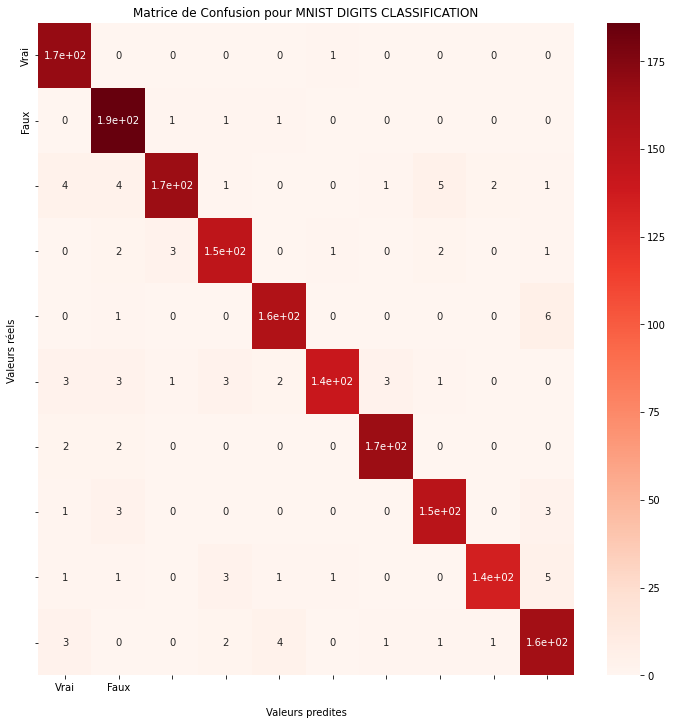

In [ ]:
AfficherMatriceConfusion((12,12),matconf)

### Calcul des metriques

#### Extraction VP, FP, FN, VN

In [ ]:
VP,FP,VN,FN = vp_np(mat_VP_FP(10,matconf),8)

Pour la classe  8
VP =  135.0  FP =  12.0  VN =  1443.0  FN =  77.0


#### Calcul : Rappel, Specificite, Taux de Faux Positif, Precision pour la classe 8

In [ ]:
rappel_classe8 = rappel(VP,FN)

In [ ]:
precision_classe8 = precision(VP,FP)

In [ ]:
taux_faux_positif_classe8 = taux_FP(FP,VP)

In [ ]:
specificite_classe8 = specificite(VN,FP)

In [ ]:
accuracy_knn = (VP + VN)/(VP + VN + FP+FN)

In [ ]:
print("classe8\n","rappel = ", rappel_classe8," precision = ",precision_classe8," taux de faux positif = ", taux_faux_positif_classe8," specificite = ",specificite_classe8," accuracy = ",accuracy_knn)

classe8
 rappel =  0.6367924528301887  precision =  0.9183673469387755  taux de faux positif =  0.08163265306122448  specificite =  0.9917525773195877  accuracy =  0.9466106778644271


### Taux de l'algorithme KNN avec K = 3 et la distance euclidienne est de 92% pour la classe 8

## Application de KNN sur la base de données avec K = 3 et distance de manatthan

In [ ]:
y_pred_knn_manatthan = np.zeros_like(Ytt)

j =0
for i in range(Ytt.shape[0]):
  print("iteration = ",i)
  y_pred_knn_manatthan[i] = KNN_manatthan(Xtt[j],Xt,Yt,3)
  j=j+1

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
iteration =  417
Le vecteur des distances :  [4898, 6410, 6088]
Le vecteur des étiquettes :  [7 7 7]
L'étiquette retournée par KNN est = : 7
iteration =  418
Le vecteur des distances :  [2289, 2167, 1818]
Le vecteur des étiquettes :  [1 1 1]
L'étiquette retournée par KNN est = : 1
iteration =  419
Le vecteur des distances :  [7812, 6848, 7477]
Le vecteur des étiquettes :  [7 1 1]
L'étiquette retournée par KNN est = : 1
iteration =  420
Le vecteur des distances :  [6436, 6418, 6447]
Le vecteur des étiquettes :  [6 6 0]
L'étiquette retournée par KNN est = : 6
iteration =  421
Le vecteur des distances :  [2584, 2545, 2046]
Le vecteur des étiquettes :  [1 1 1]
L'étiquette retournée par KNN est = : 1
iteration =  422
Le vecteur des distances :  [8200, 7814, 9164]
Le vecteur des étiquettes :  [4 4 4]
L'étiquette retournée par KNN est = : 4
iteration =  423
Le vecteur des distances :  [8001, 7865, 6093]
Le vecteur d

### Afficher les predictions pour KNN avec manatrhan

### Matrice de confusion pour KNN avec la distance de manatthan

In [ ]:
y_pred_knn_manatthan

array([5, 1, 5, ..., 6, 2, 2])

#### Matrice de confusion avec notre fonction

In [ ]:
mat_conf_knn_manhattan = ConfusionMatrix(Ytt, y_pred_knn_manatthan)

In [ ]:
mat_conf_knn_manhattan

array([[164.,   0.,   1.,   1.,   0.,   2.,   1.,   0.,   0.,   0.],
       [  0., 186.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.],
       [  5.,   7., 160.,   1.,   0.,   1.,   2.,   6.,   1.,   1.],
       [  0.,   2.,   1., 142.,   0.,   7.,   0.,   3.,   0.,   1.],
       [  0.,   2.,   0.,   0., 154.,   0.,   1.,   0.,   0.,   6.],
       [  3.,   3.,   0.,   5.,   3., 137.,   3.,   1.,   0.,   2.],
       [  2.,   3.,   0.,   0.,   1.,   0., 164.,   0.,   0.,   0.],
       [  0.,   5.,   0.,   0.,   2.,   0.,   0., 148.,   0.,   2.],
       [  2.,   3.,   3.,   4.,   1.,   0.,   0.,   1., 127.,   6.],
       [  2.,   1.,   1.,   2.,   5.,   2.,   0.,   2.,   0., 160.]])

#### Matrice de confusion avec sklearn

In [ ]:
confusion_matrix(Ytt, y_pred_knn_manatthan)

array([[164,   0,   1,   1,   0,   2,   1,   0,   0,   0],
       [  0, 186,   1,   0,   1,   0,   0,   1,   0,   0],
       [  5,   7, 160,   1,   0,   1,   2,   6,   1,   1],
       [  0,   2,   1, 142,   0,   7,   0,   3,   0,   1],
       [  0,   2,   0,   0, 154,   0,   1,   0,   0,   6],
       [  3,   3,   0,   5,   3, 137,   3,   1,   0,   2],
       [  2,   3,   0,   0,   1,   0, 164,   0,   0,   0],
       [  0,   5,   0,   0,   2,   0,   0, 148,   0,   2],
       [  2,   3,   3,   4,   1,   0,   0,   1, 127,   6],
       [  2,   1,   1,   2,   5,   2,   0,   2,   0, 160]])

#### Affichage de la matrice de confusion

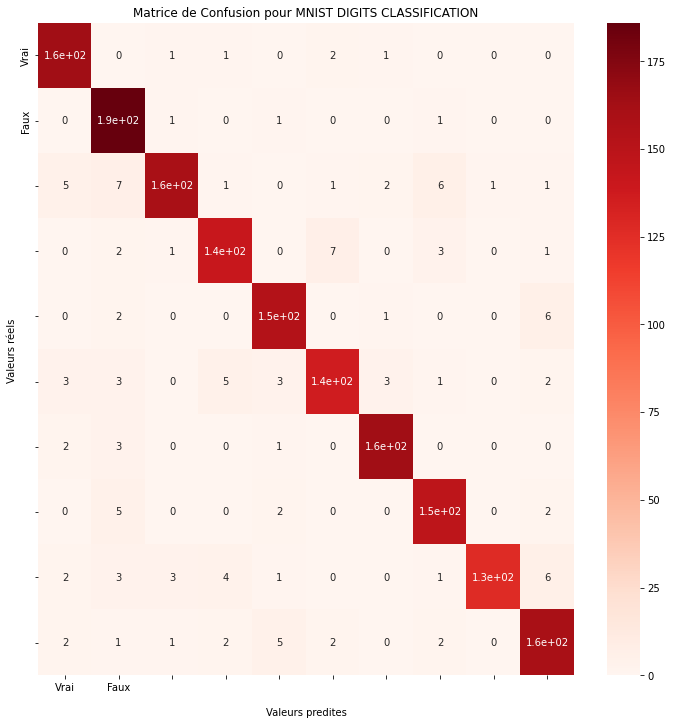

In [ ]:
AfficherMatriceConfusion((12,12),mat_conf_knn_manhattan)

### Calcul des metriques

#### Extraction des VP, FP, VN, FN

In [ ]:
VP_manhattan,FP_manhattan,VN_manhattan,FN_manhattan = vp_np(mat_VP_FP(10,mat_conf_knn_manhattan),8)

Pour la classe  8
VP =  127.0  FP =  20.0  VN =  1415.0  FN =  105.0


#### Calcul des metriques : Rappel, Precision, Taux de Faux Positifs, Sensitivité pour manatthan

In [ ]:
rappel_classe8 = rappel(VP_manhattan,FN_manhattan)

In [ ]:
precision_classe8 = precision(VP_manhattan,FP_manhattan)

In [ ]:
taux_faux_positif_classe8 = taux_FP(FP_manhattan,VP_manhattan)

In [ ]:
specificite_classe8 = specificite(VN_manhattan,FP_manhattan)

In [ ]:
accuracy_knn_manatthan = (VP_manhattan + VN_manhattan)/(VP_manhattan + VN_manhattan + FP_manhattan+FN_manhattan)

In [ ]:
print("classe8\n","rappel = ", rappel_classe8," precision = ",precision_classe8," taux de faux positif = ", taux_faux_positif_classe8," specificite = ",specificite_classe8," accuracy = ",accuracy_knn_manatthan)

classe8
 rappel =  0.5474137931034483  precision =  0.8639455782312925  taux de faux positif =  0.1360544217687075  specificite =  0.9860627177700348  accuracy =  0.9250149970005999


### Taux de l'algorithme KNN avec k = 3 et la distance de manatthan est = 86% pour la classe 8

## Application de l'algorithme KNN sur la base de données avec K = 3 et la distance de hamming

In [ ]:
y_pred_knn_hamming= np.zeros_like(Ytt)

j =0
for i in range(Ytt.shape[0]):
  print("iteration = ",i)
  y_pred_knn_hamming[i] = KNN_hamming(Xtt[j],Xt,Yt,3)
  j=j+1

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
iteration =  417
Le vecteur des distances :  [0.44, 0.445, 0.44]
Le vecteur des étiquettes :  [7 3 7]
L'étiquette retournée par KNN est = :  7
iteration =  418
Le vecteur des distances :  [0.2325, 0.2325, 0.2325]
Le vecteur des étiquettes :  [1 1 1]
L'étiquette retournée par KNN est = :  1
iteration =  419
Le vecteur des distances :  [0.3675, 0.3725, 0.3725]
Le vecteur des étiquettes :  [1 1 1]
L'étiquette retournée par KNN est = :  1
iteration =  420
Le vecteur des distances :  [0.3425, 0.3475, 0.3375]
Le vecteur des étiquettes :  [1 6 6]
L'étiquette retournée par KNN est = :  6
iteration =  421
Le vecteur des distances :  [0.2775, 0.265, 0.275]
Le vecteur des étiquettes :  [1 1 1]
L'étiquette retournée par KNN est = :  1
iteration =  422
Le vecteur des distances :  [0.49, 0.485, 0.4725]
Le vecteur des étiquettes :  [4 7 4]
L'étiquette retournée par KNN est = :  4
iteration =  423
Le vecteur des distances : 

### Afficher les prediction pour KNN avec hamming

In [ ]:
y_pred_knn_hamming

array([0, 1, 5, ..., 3, 1, 1])

### Matrice de confusion pour KNN avec la distance de hamming

#### Matrice de confusion avec notre fonction

In [ ]:
mat_conf_knn_hamming = ConfusionMatrix(Ytt, y_pred_knn_hamming)

In [ ]:
mat_conf_knn_hamming

array([[120.,  31.,   2.,   0.,   4.,   5.,   3.,   0.,   3.,   1.],
       [  0., 186.,   0.,   1.,   2.,   0.,   0.,   0.,   0.,   0.],
       [  3.,  90.,  52.,   6.,   7.,   8.,  10.,   4.,   3.,   1.],
       [  1.,  87.,   3.,  37.,   5.,   4.,   4.,   4.,   8.,   3.],
       [  0.,  46.,   5.,   1.,  82.,   2.,   3.,   1.,   1.,  22.],
       [  5.,  57.,   3.,   9.,  11.,  45.,  11.,   0.,   3.,  13.],
       [  2.,  32.,   3.,   2.,  10.,   2., 117.,   0.,   2.,   0.],
       [  0.,  27.,   1.,   2.,  10.,   2.,   0., 102.,   0.,  13.],
       [  2.,  69.,   5.,   4.,   5.,   5.,   3.,   4.,  44.,   6.],
       [  3.,  23.,   2.,   1.,  14.,   3.,   0.,  12.,   0., 117.]])

#### Matrice de confusion avec Sklearn

In [ ]:
confusion_matrix(Ytt, y_pred_knn_hamming)

array([[120,  31,   2,   0,   4,   5,   3,   0,   3,   1],
       [  0, 186,   0,   1,   2,   0,   0,   0,   0,   0],
       [  3,  90,  52,   6,   7,   8,  10,   4,   3,   1],
       [  1,  87,   3,  37,   5,   4,   4,   4,   8,   3],
       [  0,  46,   5,   1,  82,   2,   3,   1,   1,  22],
       [  5,  57,   3,   9,  11,  45,  11,   0,   3,  13],
       [  2,  32,   3,   2,  10,   2, 117,   0,   2,   0],
       [  0,  27,   1,   2,  10,   2,   0, 102,   0,  13],
       [  2,  69,   5,   4,   5,   5,   3,   4,  44,   6],
       [  3,  23,   2,   1,  14,   3,   0,  12,   0, 117]])

#### Affichage de la matrice de confusion

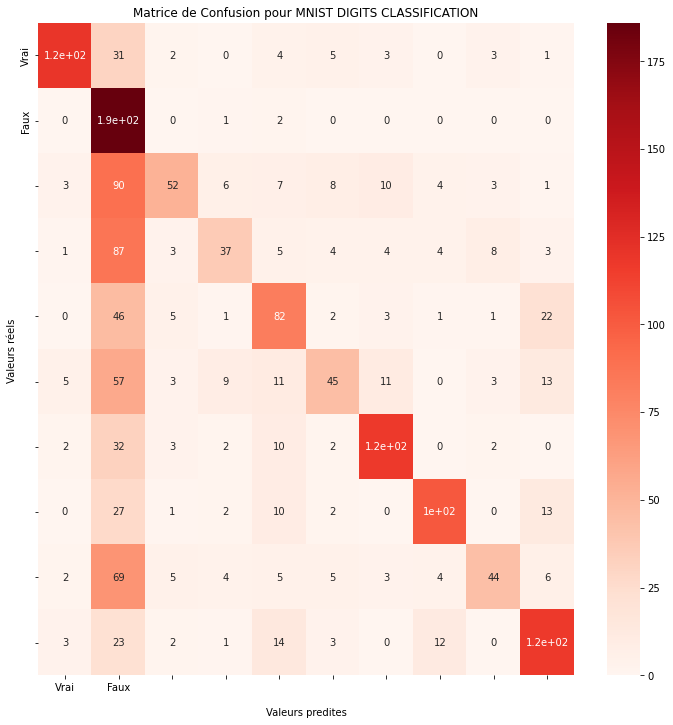

In [ ]:
AfficherMatriceConfusion((12,12),mat_conf_knn_hamming)

### Calcul des metriques

#### Extraction des VP,FP,VN,FN

In [ ]:
VP_hamming,FP_hamming,VN_hamming,FN_hamming = vp_np(mat_VP_FP(10,mat_conf_knn_hamming),8)

Pour la classe  8
VP =  44.0  FP =  103.0  VN =  858.0  FN =  662.0


#### Calcul des metriques : Rappel, Precision, Taux de Faux Positifs, Sensitivité pour la classe 8

In [ ]:
rappel_classe8 = rappel(VP_hamming,FN_hamming)

In [ ]:
precision_classe8 = precision(VP_hamming,FP_hamming)

In [ ]:
taux_faux_positif_classe8 = taux_FP(FP_hamming,VP_hamming)

In [ ]:
specificite_classe8 = specificite(VN_hamming,FP_hamming)

In [ ]:
accuracy_knn_hamming = (VP_hamming + VN_hamming)/(VP_hamming+ VN_hamming + FP_hamming + FN_hamming)

In [ ]:
print("classe8\n","rappel = ", rappel_classe8," precision = ",precision_classe8," taux de faux positif = ", taux_faux_positif_classe8," specificite = ",specificite_classe8," accuracy = ",accuracy_knn_hamming)

classe8
 rappel =  0.06232294617563739  precision =  0.29931972789115646  taux de faux positif =  0.7006802721088435  specificite =  0.8928199791883454  accuracy =  0.5410917816436712


#### Taux de precision de KNN avec K = 3 et distance de hamming pour la classe 8 est = 29%

## Donc pour une classe choisit (classe 8 ) l'algorithme avec k = 3 et avec la distance euclidienne est le meilleur

# SVM

## Model SVM

In [ ]:
#Créer le modèle
model= svm.SVC(kernel='linear',probability = True)
# entrainement
model.fit(Xt, Yt)
# Prediction
y_pred_svm = model.predict(Xtt)

## Score du model svm

In [ ]:
model.score(Xtt, Ytt)

0.9124175164967007

## Calcul des predictions sous forme de probabilitées

In [ ]:
proba_svm = model.predict_proba(Xtt)

In [ ]:
proba_svm

array([[1.20466975e-02, 2.42540241e-03, 1.39617095e-02, ...,
        3.34311649e-03, 1.50470322e-02, 1.34901789e-01],
       [1.42012758e-04, 9.88914601e-01, 3.03585483e-03, ...,
        1.34712536e-03, 3.31058699e-03, 1.43685893e-03],
       [1.30121092e-02, 1.36674689e-02, 8.82561471e-02, ...,
        6.65709154e-03, 6.25732078e-01, 7.74163048e-03],
       ...,
       [2.06875168e-03, 3.97543930e-04, 3.68164633e-02, ...,
        3.04540022e-04, 5.36701756e-03, 9.77476997e-04],
       [4.43785484e-07, 1.87378210e-06, 9.99440944e-01, ...,
        3.31736319e-04, 5.56535326e-05, 2.72214617e-06],
       [3.66397741e-07, 3.44227868e-07, 9.98980181e-01, ...,
        6.11187969e-07, 1.11505397e-04, 3.02613859e-07]])

## Affichage resultat d'un test sur SVM

La classe predite :  3  avec probabilite =  0.6712818975358112
La verite terain :  3


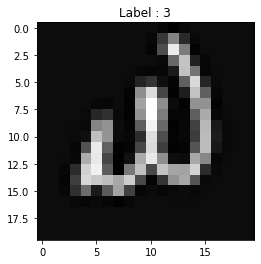

In [ ]:
#L'indice de la classe qui a laplus grande probabilité
print("La classe predite : ",np.argmax(proba_svm[0]), " avec probabilite = ", np.max(proba_svm[0]))
print("La verite terain : ",Ytt[0])
plt.title("Label : " + str(y_pred_svm[0]))
plt.imshow(Xtt[0].reshape(20,20), cmap= "gray")

## Calcul de l'erreur

In [ ]:
#Erreur de prediction
from sklearn import metrics
err = 1.0 - metrics.accuracy_score(Ytt,y_pred_svm)
print(err)

0.08758248350329934


## Application des metriques sur SVM

### Matrice de confusion

#### Matrice de confusion avec notre fonction

In [ ]:
ConfusionMatrix(Ytt, y_pred_svm)

array([[167.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.],
       [  0., 185.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   1.],
       [  2.,   1., 167.,   5.,   3.,   2.,   1.,   2.,   0.,   1.],
       [  0.,   2.,   4., 140.,   0.,   5.,   0.,   2.,   0.,   3.],
       [  0.,   0.,   3.,   1., 153.,   0.,   2.,   0.,   2.,   2.],
       [  3.,   2.,   2.,   7.,   1., 132.,   4.,   3.,   3.,   0.],
       [  1.,   1.,   3.,   0.,   3.,   4., 157.,   0.,   1.,   0.],
       [  0.,   1.,   3.,   0.,   1.,   0.,   0., 146.,   0.,   6.],
       [  2.,   2.,   7.,  12.,   0.,   5.,   0.,   0., 118.,   1.],
       [  2.,   0.,   1.,   3.,   6.,   1.,   0.,   3.,   3., 156.]])

#### Matrice de confusion avec Sklearn

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Ytt, y_pred_svm)

array([[167,   0,   0,   0,   1,   0,   0,   1,   0,   0],
       [  0, 185,   2,   0,   1,   0,   0,   0,   0,   1],
       [  2,   1, 167,   5,   3,   2,   1,   2,   0,   1],
       [  0,   2,   4, 140,   0,   5,   0,   2,   0,   3],
       [  0,   0,   3,   1, 153,   0,   2,   0,   2,   2],
       [  3,   2,   2,   7,   1, 132,   4,   3,   3,   0],
       [  1,   1,   3,   0,   3,   4, 157,   0,   1,   0],
       [  0,   1,   3,   0,   1,   0,   0, 146,   0,   6],
       [  2,   2,   7,  12,   0,   5,   0,   0, 118,   1],
       [  2,   0,   1,   3,   6,   1,   0,   3,   3, 156]])

Juste un verification manuelle des résultats

In [ ]:
matc = np.zeros((10,10))

for i in range(Ytt.shape[0]):
  matc[Ytt[i]][y_pred_svm[i]] +=1
print(matc)

[[167.   0.   0.   0.   1.   0.   0.   1.   0.   0.]
 [  0. 185.   2.   0.   1.   0.   0.   0.   0.   1.]
 [  2.   1. 167.   5.   3.   2.   1.   2.   0.   1.]
 [  0.   2.   4. 140.   0.   5.   0.   2.   0.   3.]
 [  0.   0.   3.   1. 153.   0.   2.   0.   2.   2.]
 [  3.   2.   2.   7.   1. 132.   4.   3.   3.   0.]
 [  1.   1.   3.   0.   3.   4. 157.   0.   1.   0.]
 [  0.   1.   3.   0.   1.   0.   0. 146.   0.   6.]
 [  2.   2.   7.  12.   0.   5.   0.   0. 118.   1.]
 [  2.   0.   1.   3.   6.   1.   0.   3.   3. 156.]]


### Affichage de la Matrice de Confusion:

Utilisation de la libraire seaborn. Cette librarie offre de nombreses methodes d'affichage, elle est très utilisé dans le domaine de la représentation graphique et de l'imagerie

In [ ]:
matrice = ConfusionMatrix(Ytt, y_pred_svm)


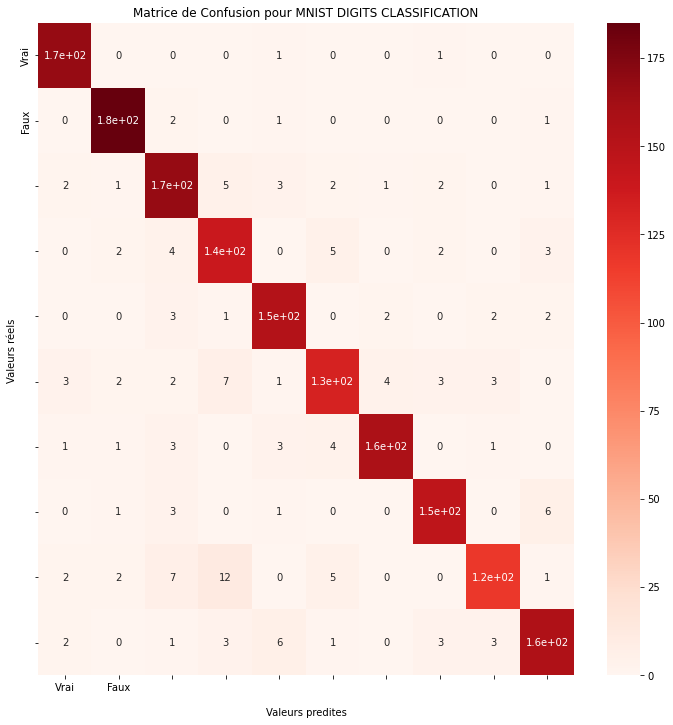

In [ ]:
AfficherMatriceConfusion((12,12),matrice)

### Calcule des metriques :  Rappel, Specificité , Precision, Taux de Faux Positifs pour la classe 8

In [ ]:
VP,FP,VN,FN = vp_np(mat_VP_FP(10,matrice),8)


Pour la classe  8
VP =  118.0  FP =  29.0  VN =  1403.0  FN =  117.0


In [ ]:
rappel_classe8 = rappel(VP,FN)

In [ ]:
precision_classe8 = precision(VP,FP)

In [ ]:
taux_faux_positif_classe8 = taux_FP(FP,VP)

In [ ]:
specificite_classe8 = specificite(VN,FP)

In [ ]:
print("classe8\n","rappel = ", rappel_classe8," precision = ",precision_classe8," taux de faux positif = ", taux_faux_positif_classe8," specificite = ",specificite_classe8)

classe8
 rappel =  0.502127659574468  precision =  0.8027210884353742  taux de faux positif =  0.19727891156462585  specificite =  0.9797486033519553


## Courbe ROC

### Définition des seuils, le calcul se fait pour chaque classe

In [ ]:
vect_classes = np.array([0,1,2,3,4,5,6,7,8,9])
seuils = [0.1,0.2,0.4,0.6,0.8,0.9]
seuils = np.array(seuils)

### Affichage de la courbe roc pour chaque classe de notre dataset

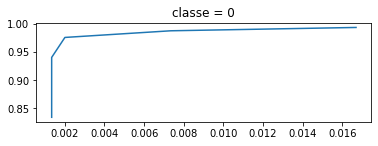

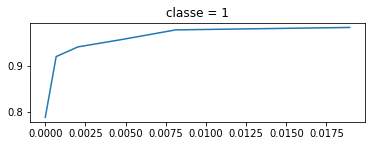

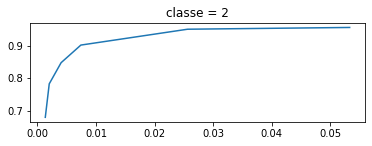

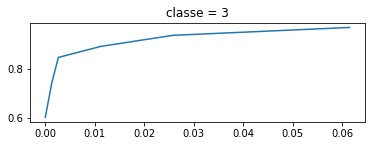

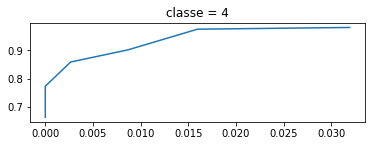

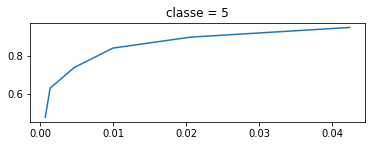

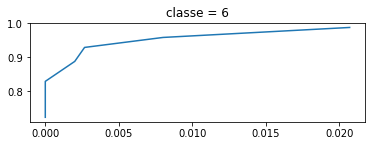

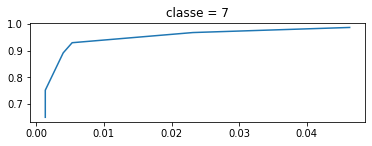

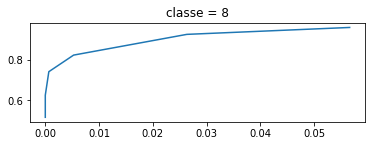

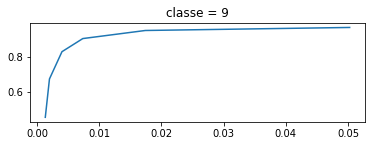

In [ ]:
ROC(vect_classes,seuils,Ytt,proba_svm)

# Arbres de décision

## Model d'arbre de decision (Decision Tree classifier)

In [ ]:
# Créer le modèle
model = DecisionTreeClassifier(max_depth=5) # definir une profondeur pour notre arbre, ainsi l'arbre s'arretera à une profondeur donnée
## Car si on ne fixe pas la profondeur, l'arbre va grandir jusqu'à atteindre le moins d'échantillons possible dans chauqe feuille
# Entrainer le modèle
model = model.fit(Xt, Yt)
# Prediction
y_pred_tree = model.predict(Xtt)

## Affichage du tableau des predicitions du model

In [ ]:
y_pred_tree

array([9, 1, 4, ..., 8, 8, 2])

## Calculer les probabilitées retournées par l'arbre de decision.

**P.S: Si lors de l'initialisation du model, on ne fixe pas la profondeur de l'arbre, nous aurons non pas des probabilitées du genre (0.2,0.25..) mais des probabilitées binairisées vu que l'arbre va grandire jusqu'à la profondeur où chaque feuille aura le moins d'echantillons possible**

In [ ]:
y_proba_tree = model.predict_proba(Xtt)

### Affichager des probabilitées de l'arbre de decision

In [ ]:
y_proba_tree

array([[0.00340909, 0.01590909, 0.05113636, ..., 0.25568182, 0.05340909,
        0.32727273],
       [0.        , 0.92825112, 0.03139013, ..., 0.00896861, 0.0044843 ,
        0.0044843 ],
       [0.        , 0.02572347, 0.0192926 , ..., 0.08681672, 0.00643087,
        0.0096463 ],
       ...,
       [0.01762115, 0.04845815, 0.23568282, ..., 0.00660793, 0.43612335,
        0.02202643],
       [0.01762115, 0.04845815, 0.23568282, ..., 0.00660793, 0.43612335,
        0.02202643],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

## Calcul du score de l'arbre de decision

In [ ]:
model.score(Xtt, Ytt)

0.5476904619076185

## Affichage d'un resultat de test sur les Arbres de décision

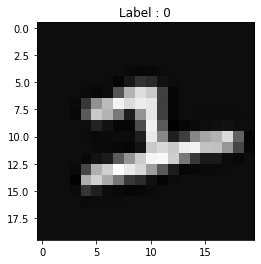

In [ ]:
plt.title("Label : " + str(y_pred_tree[20]))
plt.imshow(Xt[20].reshape(20,20), cmap= "gray")

## Matrice de confusion

### Matrice de confusion avec notre fonction

In [ ]:
ConfusionMatrix(Ytt, y_pred_tree)

array([[137.,   2.,   4.,   3.,   0.,   5.,  11.,   3.,   2.,   2.],
       [  0., 136.,   0.,   5.,   9.,   0.,   2.,   0.,  31.,   6.],
       [  2.,  14.,  49.,  17.,   4.,   2.,   4.,   1.,  67.,  24.],
       [  0.,  11.,  10.,  83.,   1.,   6.,   1.,   1.,  11.,  32.],
       [  0.,   2.,   1.,   3.,  95.,   1.,   0.,   2.,  18.,  41.],
       [  3.,   7.,   7.,  28.,  16.,  33.,   7.,   4.,   8.,  44.],
       [  2.,   1.,  17.,   5.,  16.,   1.,  84.,   0.,  35.,   9.],
       [  0.,   4.,   0.,   3.,  13.,   2.,   0.,  24.,   4., 107.],
       [  0.,   1.,   1.,   8.,   1.,   1.,   1.,   0., 119.,  15.],
       [  1.,   0.,   3.,   2.,   5.,   2.,   0.,   3.,   6., 153.]])

### Matrice de confusion avec Sklearn

In [ ]:
confusion_matrix(Ytt,y_pred_tree)

array([[137,   2,   4,   3,   0,   5,  11,   3,   2,   2],
       [  0, 136,   0,   5,   9,   0,   2,   0,  31,   6],
       [  2,  14,  49,  17,   4,   2,   4,   1,  67,  24],
       [  0,  11,  10,  83,   1,   6,   1,   1,  11,  32],
       [  0,   2,   1,   3,  95,   1,   0,   2,  18,  41],
       [  3,   7,   7,  28,  16,  33,   7,   4,   8,  44],
       [  2,   1,  17,   5,  16,   1,  84,   0,  35,   9],
       [  0,   4,   0,   3,  13,   2,   0,  24,   4, 107],
       [  0,   1,   1,   8,   1,   1,   1,   0, 119,  15],
       [  1,   0,   3,   2,   5,   2,   0,   3,   6, 153]])

### Affichage de la matrice de Confusion

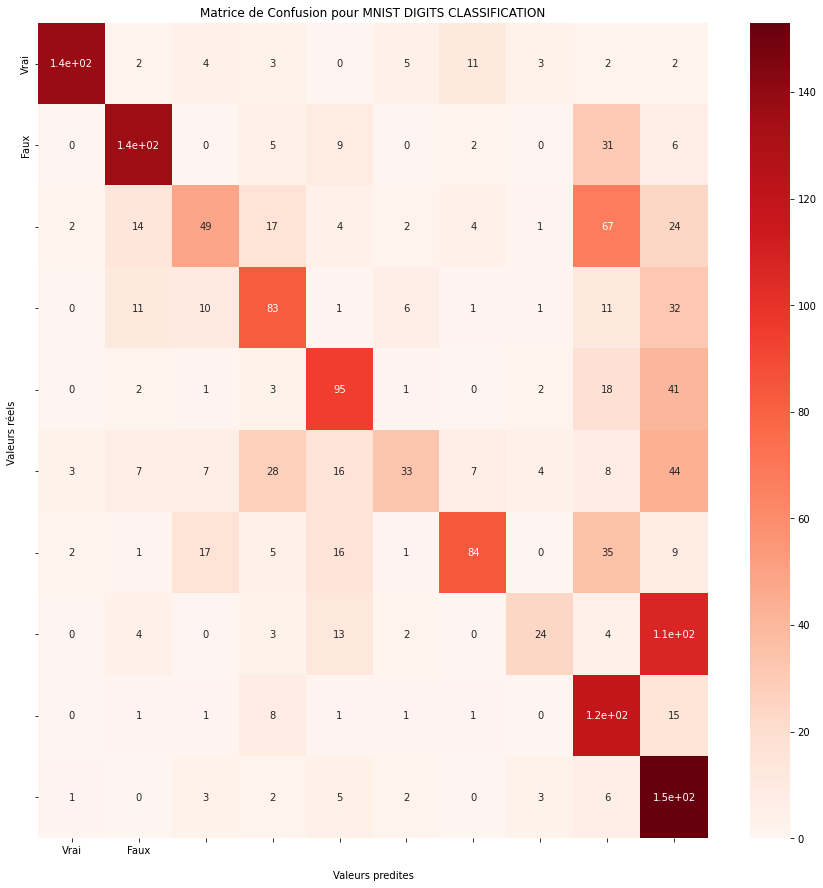

In [ ]:
m = ConfusionMatrix(Ytt, y_pred_tree)
AfficherMatriceConfusion((15,15),m)

## Calcul des metriques

### Extraction des VP, FP, VN, FN

In [ ]:
VP,FP,VN,FN = vp_np(mat_VP_FP(10,m),8)

Pour la classe  8
VP =  119.0  FP =  28.0  VN =  794.0  FN =  726.0


### Calcule des metriques : Rappel, Specificité, Precision, Taux de Faux Positifs pour la classe 8

In [ ]:
rappel_classe8 = rappel(VP,FN)

In [ ]:
precision_classe8 = precision(VP,FP)

In [ ]:
taux_faux_positif_classe8 = taux_FP(FP,VP)

In [ ]:
specificite_classe8 = specificite(VP,FP)

In [ ]:
print("classe8\n","rappel = ", rappel_classe8," precision = ",precision_classe8," taux de faux positif = ", taux_faux_positif_classe8," specificite = ",specificite_classe8)

classe8
 rappel =  0.1408284023668639  precision =  0.8095238095238095  taux de faux positif =  0.19047619047619047  specificite =  0.8095238095238095


## Courbe ROC

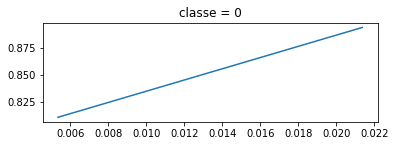

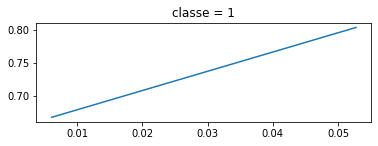

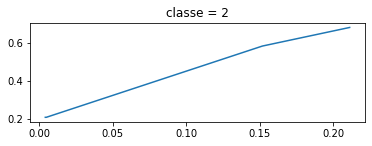

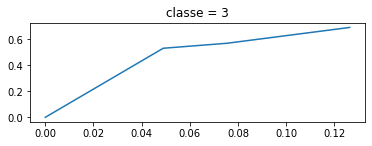

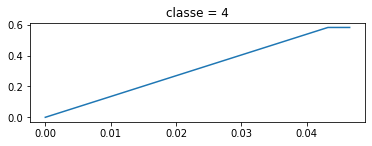

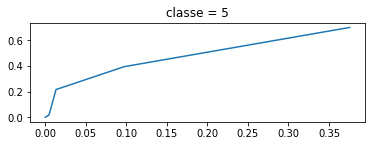

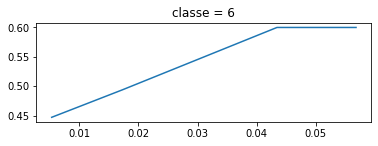

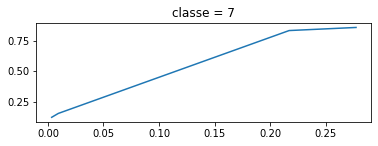

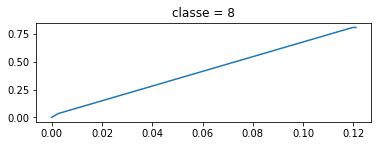

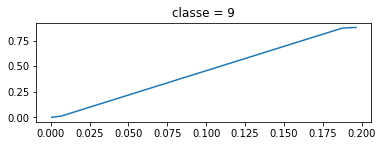

In [ ]:
ROC(vect_classes,seuils,Ytt,y_proba_tree)

# Réseau de noeurones artificielles :
Dans cette partie nous allons utilisé les réseaux de noeurones artificielles.

Nous avons asusi voulu implementer notre propre model afin d'avoir une petite introduction à tensorflow vu que ces models sont très utilisés en computer vision.

## Model 1

In [ ]:
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)
model.fit(Xt, Yt)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=25, max_iter=100000, solver='sgd')

### Calcul des probabilitées pour une image

In [ ]:
model.predict([Xtt[7,:]])

array([4])

## Precision du model 1

In [ ]:
model.score(Xtt, Ytt)

0.2894285714285714

## Prediction du model 1

### Calcul des predicitions du model 1

In [ ]:
y_pred_ann = model.predict(Xtt)

### Affichage des predictions du model 1

In [ ]:
y_pred_ann

array([0, 4, 4, ..., 4, 0, 1])

## Probabilitées du model 1

### Calcul des probabilitées du model 1

In [ ]:
y_proba_ann = model.predict_proba(Xtt)

### Affichage des probabilitées du model 1

In [ ]:
y_proba_ann

array([[9.99999747e-01, 2.33449418e-73, 6.53164841e-45, ...,
        2.47540783e-07, 1.47959020e-46, 4.66159733e-37],
       [2.64145835e-02, 2.29444442e-02, 1.16261269e-01, ...,
        1.18932427e-01, 1.11149471e-01, 1.17913992e-01],
       [2.64145835e-02, 2.29444442e-02, 1.16261269e-01, ...,
        1.18932427e-01, 1.11149471e-01, 1.17913992e-01],
       ...,
       [2.64145835e-02, 2.29444442e-02, 1.16261269e-01, ...,
        1.18932427e-01, 1.11149471e-01, 1.17913992e-01],
       [9.99892124e-01, 2.38827481e-47, 7.61935655e-29, ...,
        9.89869341e-05, 6.60051172e-30, 8.37262343e-24],
       [1.22466355e-39, 9.98237670e-01, 1.35645370e-21, ...,
        8.19560624e-76, 1.76232960e-03, 6.85986136e-33]])

## Matrice de confusion pour le model 1

In [ ]:
matrice_ann = ConfusionMatrix(Ytt, y_pred_ann)

In [ ]:
ConfusionMatrix(Ytt, y_pred_ann)

array([[328.,   0.,   0.,   0.,  22.,   0.,   0.,   4.,   0.,   0.],
       [  0., 340.,   0.,   0.,   8.,   0.,   3.,   0.,   0.,   0.],
       [ 14.,   7.,   0.,   0., 322.,   0.,   0.,   6.,   5.,   0.],
       [  2.,   3.,   0.,   0., 350.,   0.,   3.,   0.,   0.,   0.],
       [  1.,   2.,   0.,   0., 334.,   0.,   0.,   1.,   0.,   0.],
       [ 10.,   2.,   0.,   0., 325.,   2.,   3.,   9.,   0.,   0.],
       [ 11.,   3.,   0.,   0., 326.,   0.,   1.,   1.,   1.,   0.],
       [  3.,   6.,   0.,   0., 330.,   0.,   1.,   4.,   6.,   0.],
       [  4.,   7.,   0.,   0., 335.,   0.,   0.,   0.,   4.,   0.],
       [  7.,   4.,   0.,   0., 338.,   0.,   1.,   0.,   1.,   0.]])

### Matrice de confusion du model 1 avec Sklearn

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Ytt,y_pred_ann)

array([[328,   0,   0,   0,  22,   0,   0,   4,   0,   0],
       [  0, 340,   0,   0,   8,   0,   3,   0,   0,   0],
       [ 14,   7,   0,   0, 322,   0,   0,   6,   5,   0],
       [  2,   3,   0,   0, 350,   0,   3,   0,   0,   0],
       [  1,   2,   0,   0, 334,   0,   0,   1,   0,   0],
       [ 10,   2,   0,   0, 325,   2,   3,   9,   0,   0],
       [ 11,   3,   0,   0, 326,   0,   1,   1,   1,   0],
       [  3,   6,   0,   0, 330,   0,   1,   4,   6,   0],
       [  4,   7,   0,   0, 335,   0,   0,   0,   4,   0],
       [  7,   4,   0,   0, 338,   0,   1,   0,   1,   0]])

### Affichage de la matrice de confusion

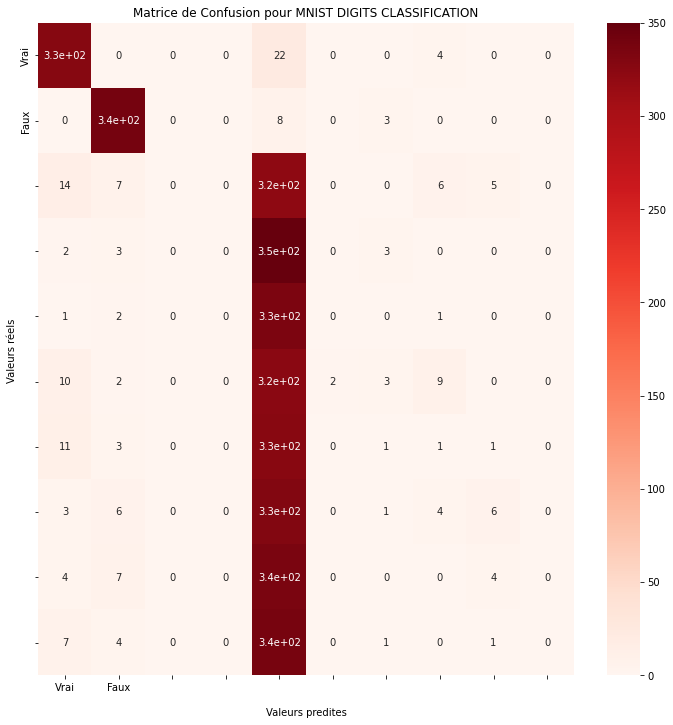

In [ ]:
AfficherMatriceConfusion((12,12),matrice_ann)

## Calcul des metriques : Rappel, Specificité, Precision, Taux de Faux Positifs pour la classe 1

In [ ]:
VP,FP,VN,FN = vp_np(mat_VP_FP(10,matrice_ann),1)


Pour la classe  1
VP =  340.0  FP =  11.0  VN =  673.0  FN =  2476.0


In [ ]:
rappel_classe8 = rappel(VP,FN)

In [ ]:
precision_classe8 = precision(VP,FP)

In [ ]:
taux_faux_positif_classe8 = taux_FP(FP,VP)

In [ ]:
specificite_classe8 = specificite(VP,FP)

In [ ]:
print("classe1\n","rappel = ", rappel_classe8," precision = ",precision_classe8," taux de faux positif = ", taux_faux_positif_classe8," specificite = ",specificite_classe8)

classe1
 rappel =  0.12073863636363637  precision =  0.9686609686609686  taux de faux positif =  0.03133903133903134  specificite =  0.9686609686609686


## Courbe roc

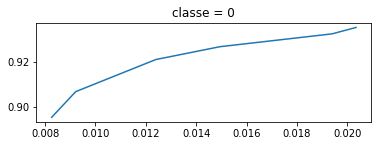

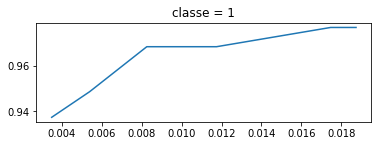

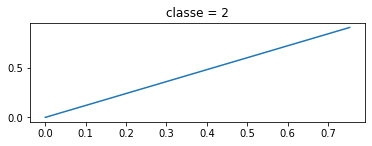

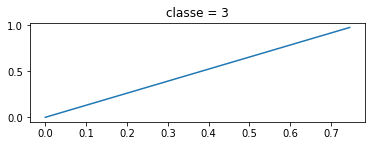

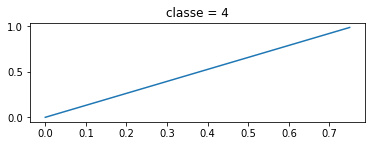

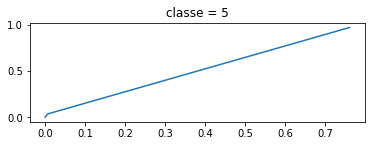

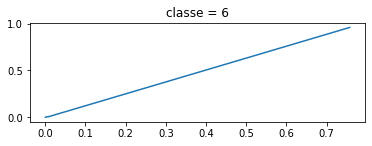

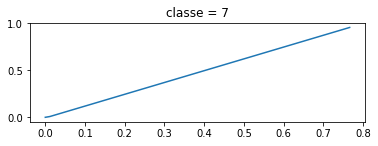

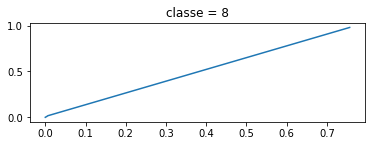

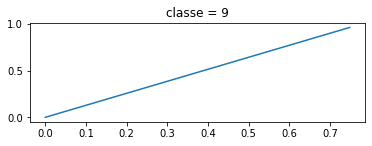

In [ ]:
ROC(vect_classes,seuils,Ytt,y_proba_ann)

# Notre modèle

## Nous avons divisé nos données

In [ ]:
Xt_rnn, Xtt_rnn, yt_rnn, ytt_rnn = train_test_split(X,Y, test_size = 0.25, random_state=42,shuffle=True)

In [ ]:
Xt1 = Xt_rnn
Xtt1 = Xtt_rnn

## Modification de nos données afin qu'il puisse être compris pas le model

In [ ]:
xt = Xt1.reshape(len(Xt1),20*20)
xtt = Xtt1.reshape(len(Xtt1),20*20)

In [ ]:
xt.shape

(3750, 400)

## Création du model :
Dans cette section nous allons créer notre model. Notre model sera un model sequentiel.

**Exemple:**
Si nous avons 2 layers (couche de noeurones )
alors le model sera sous cette frome :  Layer 1  -> Layer 2.

Maintenant, nous allons passé à l'architechture de notre model :

Nous avons choisit trois layers pour le model, c'est après de nombreuses tentaive pour atteindre un taux de precision que ne nous somme fixé (le but est d'atteindre un taux de 80% après évaluation du model).

Ensuite, Nous avons ajouté une fonction d'activation pour chaque layer. Une fonction d'activation peut être vu comme la façon (manière) que notre noeurones voit les données pour mieux les apprendre. Il existe plusieurs fonction d'activation : softmax, relu, sigmoid.

**La fonction ReLu** : C'est la fonction la plus utilisé de par sa simplicité. En effet, cette fonction retourne le max(0, X) tel que X est une valeur de nos données. Elle effectue un ***lissage** sur nos données car elle laisse passer que les valeurs positives.

\begin{align}
        \mathbf{ReLu(x)} = \max({x},{0})
\end{align}

<center>
<img src = "https://i0.wp.com/inside-machinelearning.com/wp-content/uploads/2021/02/ReLU.png?resize=300%2C205&ssl=1" title="Relu" >
<h2>Fonction Relu</h2>

</center>

**La fonction sigmoid** : Cette fonction peut être presenter sous cette forme :
\begin{align}
        \mathbf{Sigmoid(x)} = \frac{1}{1 + \exp^{-x}}
\end{align}

La fonction sigmoid renvoit deux valeurs 0 et 1, c'est pour cela quelle est utilisée pour la classification binaire.
Elle peut être utilisé pour une classification multi-classe (ce n'est pas recommandé) si pour un input on peut avoir plusieur sortie donc en sortie nous auront des resultats qui varient entre 0 et 1.

<center>
<img src = "https://i0.wp.com/inside-machinelearning.com/wp-content/uploads/2021/02/Sigmoid.png?resize=300%2C206&ssl=1" title="Sigmoid" >
<h2>Fonction Sigmoid</h2>

</center>

**La fonction Softmax** : La fonction Softmax transforme un vecteur de valeur réels en vecteur de probabilité où chaque vecteur est traité tout seul, elle est utilisée généralement dans le dernier layer du model.


\begin{align}
        \mathbf{Softmax(x)} = \frac{exp^x}{1 + \mathbf{sum(x)}}
\end{align}

<center>
<img src = "https://i0.wp.com/inside-machinelearning.com/wp-content/uploads/2021/02/Softmax.png?resize=300%2C207&ssl=1" title="Softmax" >
<h2>Fonction Softmax</h2>

</center>

On ce qui concerne notre architechture, nous avonc 3 layers, le premier contient 125 noeurones avec une fonction d'activation **ReLu**, le deuxième layer a 50 noeurones avec une fonction d'activation **Sigmoid**. Enfin, le dernier layer avec 10 noeurones doté d'une fonction d'activation **Softmax**

In [ ]:
from tensorflow.keras.layers import Dense
import tensorflow as tf
model_ann = tf.keras.models.Sequential([
                      Dense(126,input_shape=(400,),activation='relu'),
                      Dense(60,activation='sigmoid'),
                      Dense(10,activation='softmax'),

])


## Affichage du model

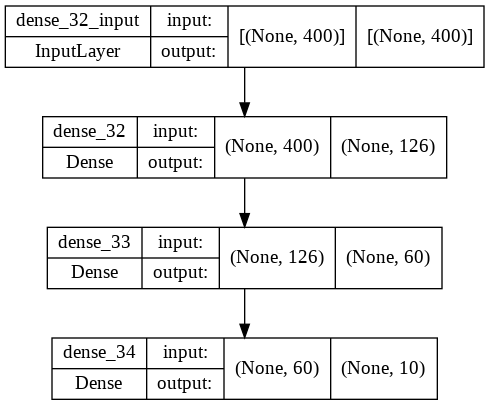

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model_ann, to_file=dot_img_file, show_shapes=True)

## Sortie du model
Vu que nous avons 10 noeurones alors pour chaque classe on aura un vecteur de prediction de dix valeurs de dimension (1,10)

In [ ]:
model_ann.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_34')>

## Compilation du model

In [ ]:
model_ann.compile(optimizer='adam',loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

## Lancer l'entrainement du model

In [ ]:
model_ann.fit(xt,yt_rnn, epochs = 50)

Epoch 1/50
118/118 [==============================] - 1s 2ms/step - loss: 1.8779 - accuracy: 0.3987
Epoch 2/50
118/118 [==============================] - 0s 3ms/step - loss: 1.1852 - accuracy: 0.7104
Epoch 3/50
118/118 [==============================] - 0s 2ms/step - loss: 0.8414 - accuracy: 0.7992
Epoch 4/50
118/118 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.8504
Epoch 5/50
118/118 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.8541
Epoch 6/50
118/118 [==============================] - 0s 2ms/step - loss: 0.4824 - accuracy: 0.8763
Epoch 7/50
118/118 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.8779
Epoch 8/50
118/118 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8997
Epoch 9/50
118/118 [==============================] - 0s 2ms/step - loss: 0.3393 - accuracy: 0.9104
Epoch 10/50
118/118 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.9072

## Evaluation du modèle
Après avoir finis l'apprentissage de notre model, nous avons obtenu :
  * Une Erreur de 26%
  * Une precision de : 92%

In [ ]:
model_ann.evaluate(Xtt_rnn, ytt_rnn)

40/40 [==============================] - 0s 2ms/step - loss: 0.2625 - accuracy: 0.9272


[0.26253074407577515, 0.9272000193595886]

## Effectuer une prediction avec notre model

In [ ]:
model_ann.predict(Xtt_rnn)

array([[6.5743334e-06, 1.5088556e-04, 3.4483711e-04, ..., 5.6039589e-05,
        3.9696772e-04, 2.0994825e-04],
       [1.0074407e-04, 1.9484726e-04, 5.1520834e-05, ..., 1.2652307e-04,
        3.3101787e-05, 3.2996375e-06],
       [3.4840654e-05, 2.8091169e-06, 2.9730505e-05, ..., 6.2977665e-07,
        1.7098823e-04, 4.8993270e-06],
       ...,
       [5.5609070e-07, 4.0545201e-06, 2.9051193e-06, ..., 1.7065919e-05,
        2.3575042e-06, 3.0780572e-04],
       [4.1858880e-06, 3.3494882e-05, 5.4731718e-05, ..., 4.4396276e-07,
        9.9882883e-01, 5.8352249e-05],
       [1.1650948e-05, 1.6544862e-05, 2.7709847e-04, ..., 1.4159918e-06,
        9.9943715e-01, 4.8490281e-05]], dtype=float32)

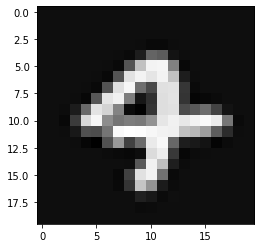

In [ ]:
plt.imshow(Xtt_rnn[10].reshape(20,20), cmap="gray")

In [ ]:
pre = model_ann.predict(Xtt_rnn)

In [ ]:
np.argmax(pre[10])

4

## Matrice de confusion

#### Avec notre fonction

In [ ]:
matrice_confusion_rnn = ConfusionMatrix(ytt_rnn,np.argmax(pre,axis = 1) )

In [ ]:
matrice_confusion_rnn

array([[142.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.],
       [  0., 119.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,   1.],
       [  0.,   2., 113.,   2.,   5.,   1.,   1.,   0.,   2.,   0.],
       [  0.,   1.,   1., 108.,   0.,   1.,   1.,   2.,   1.,   1.],
       [  1.,   0.,   1.,   0., 103.,   0.,   0.,   1.,   0.,  12.],
       [  1.,   2.,   0.,   3.,   1., 109.,   0.,   0.,   2.,   0.],
       [  3.,   0.,   0.,   0.,   0.,   2., 116.,   0.,   2.,   0.],
       [  1.,   3.,   1.,   0.,   1.,   0.,   0., 128.,   1.,   6.],
       [  1.,   2.,   0.,   1.,   0.,   2.,   1.,   0.,  97.,   2.],
       [  1.,   0.,   0.,   1.,   1.,   1.,   0.,   5.,   3., 124.]])

#### Avec Sklearn

In [ ]:
confusion_matrix(ytt_rnn,np.argmax(pre,axis = 1) )

array([[142,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0, 119,   0,   2,   0,   0,   0,   0,   1,   1],
       [  0,   2, 113,   2,   5,   1,   1,   0,   2,   0],
       [  0,   1,   1, 108,   0,   1,   1,   2,   1,   1],
       [  1,   0,   1,   0, 103,   0,   0,   1,   0,  12],
       [  1,   2,   0,   3,   1, 109,   0,   0,   2,   0],
       [  3,   0,   0,   0,   0,   2, 116,   0,   2,   0],
       [  1,   3,   1,   0,   1,   0,   0, 128,   1,   6],
       [  1,   2,   0,   1,   0,   2,   1,   0,  97,   2],
       [  1,   0,   0,   1,   1,   1,   0,   5,   3, 124]])

### Affichage de la matrice de confuision

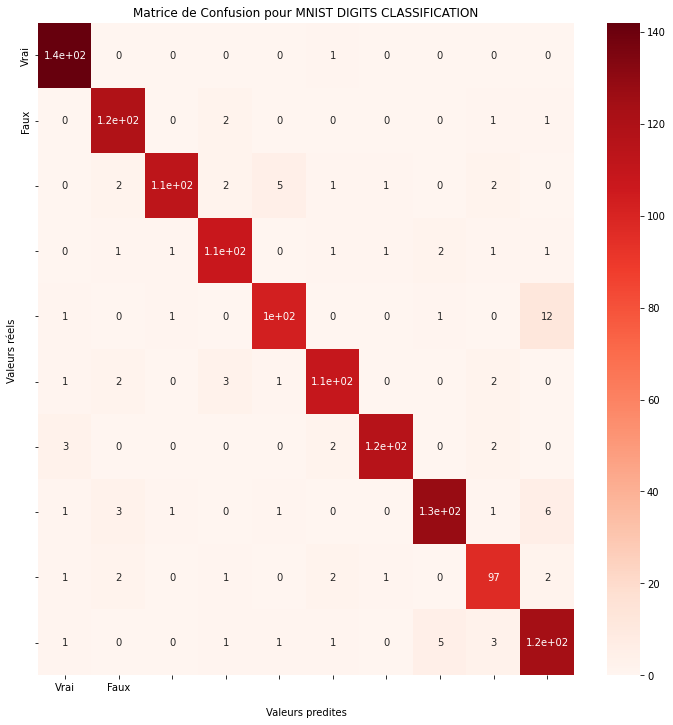

In [ ]:
AfficherMatriceConfusion((12,12), matrice_confusion_rnn)

# Calcule des metriques : Rappel, Precision, Taux de Faux positifs, Sensitivité pour la classe 1

In [ ]:
VP,FP,VN,FN = vp_np(mat_VP_FP(10,matrice_confusion_rnn),1)


Pour la classe  1
VP =  119.0  FP =  4.0  VN =  1040.0  FN =  87.0


In [ ]:
rappel_classe8 = rappel(VP,FN)

In [ ]:
precision_classe8 = precision(VP,FP)

In [ ]:
taux_faux_positif_classe8 = taux_FP(FP,VP)

In [ ]:
specificite_classe8 = specificite(VP,FP)

In [ ]:
print("classe1\n","rappel = ", rappel_classe8," precision = ",precision_classe8," taux de faux positif = ", taux_faux_positif_classe8," specificite = ",specificite_classe8)

classe1
 rappel =  0.5776699029126213  precision =  0.967479674796748  taux de faux positif =  0.032520325203252036  specificite =  0.967479674796748


# Courbe Roc

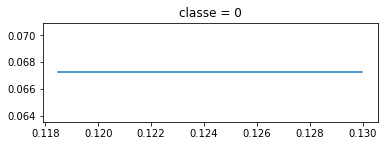

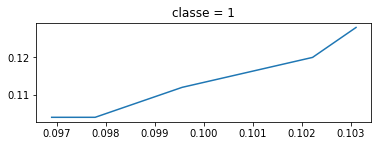

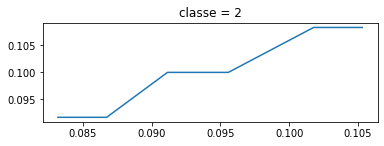

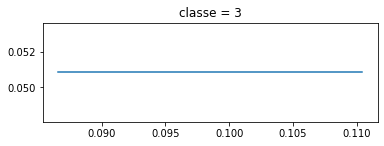

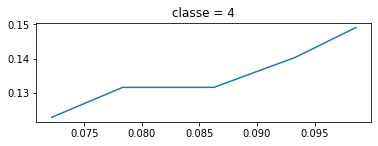

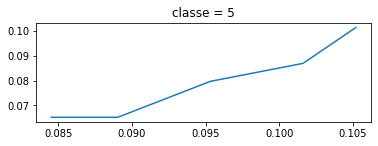

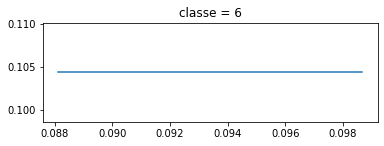

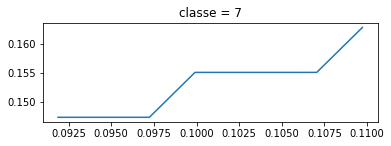

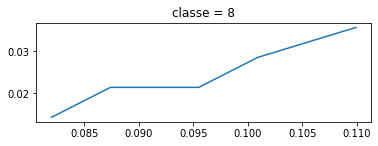

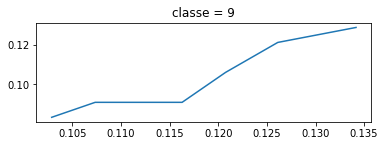

In [ ]:
ROC(vect_classes, seuils,Ytt,pre)

#RNC

In [ ]:
# reshape dataset to have a single channel
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)

Xt_rnc = Xt.reshape((Xt.shape[0], 20, 20, 1))
Xtt_rnc = Xtt.reshape((Xtt.shape[0], 20, 20, 1))

In [ ]:
# Recoder le valeurs
Yt_rnc = to_categorical(Yt)
Ytt_rnc = to_categorical(Ytt)

Xt_rncN = Xt_rnc.astype('float32')
Xtt_rncN = Xtt_rnc.astype('float32')

# normaliser
Xt_rncN = Xt_rncN / 255.0
Xtt_rncN = Xtt_rncN / 255.0

# definir le modèle RNC
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(20, 20, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compiler le modèle
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# evaluaer le modèle
_, acc = model.evaluate(Xtt_rncN, Ytt_rnc, verbose=0)


In [ ]:
model.fit(Xt_rncN,Yt_rnc, epochs = 5)

Epoch 1/5
47/47 [==============================] - 1s 10ms/step - loss: 1.0002 - accuracy: 0.6833
Epoch 2/5
47/47 [==============================] - 0s 10ms/step - loss: 0.3596 - accuracy: 0.8867
Epoch 3/5
47/47 [==============================] - 0s 10ms/step - loss: 0.2538 - accuracy: 0.9287
Epoch 4/5
47/47 [==============================] - 0s 10ms/step - loss: 0.2008 - accuracy: 0.9447
Epoch 5/5
47/47 [==============================] - 0s 10ms/step - loss: 0.1698 - accuracy: 0.9520


In [ ]:
# evaluaer le modèle
_, acc = model.evaluate(Xtt_rncN, Ytt_rnc, verbose=0)

## Evaluation du model CNN :
Precision de  : 90%

In [ ]:
acc

0.9251428842544556

## Calculer les predictions du model sur toutes la base de données

In [ ]:
prediction_cnn = model.predict(Xtt_rncN)

In [ ]:
Ytt.shape

(3500,)

In [ ]:
prediction_cnn.shape


(3500, 10)

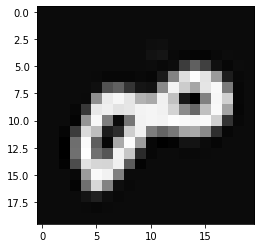

In [ ]:
plt.imshow(Xtt[10].reshape(20,20), cmap = "gray")

In [ ]:
np.argmax(prediction_cnn[10])

8

## Matrice de confusion

### Avec notre fonction

In [ ]:
matrice_confusion_cnn = ConfusionMatrix(Ytt,np.argmax(prediction_cnn, axis=1))

In [ ]:
ConfusionMatrix(Ytt,np.argmax(prediction_cnn, axis=1))

array([[338.,   1.,   3.,   1.,   1.,   2.,   1.,   2.,   5.,   0.],
       [  0., 345.,   2.,   0.,   2.,   0.,   0.,   0.,   2.,   0.],
       [  3.,   3., 334.,   2.,   2.,   0.,   0.,   0.,   9.,   1.],
       [  0.,   2.,   7., 319.,   0.,   9.,   1.,   4.,   9.,   7.],
       [  0.,   4.,   7.,   0., 304.,   0.,   5.,   1.,   3.,  14.],
       [  1.,   2.,   4.,   7.,   2., 309.,   3.,   0.,  15.,   8.],
       [  3.,   4.,   3.,   0.,   0.,   5., 326.,   0.,   2.,   0.],
       [  1.,   7.,   7.,   2.,   5.,   0.,   0., 306.,   2.,  20.],
       [  0.,   3.,   5.,   2.,   1.,   3.,   0.,   0., 331.,   5.],
       [  5.,   2.,   3.,   6.,   1.,   1.,   0.,   5.,   2., 326.]])

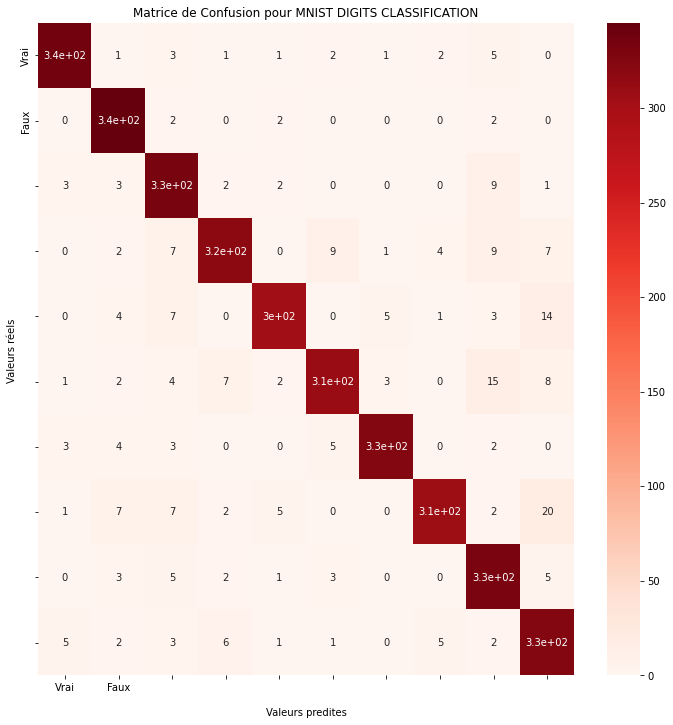

In [ ]:
AfficherMatriceConfusion((12,12),matrice_confusion_cnn)

### Avec Sklearn

In [ ]:
confusion_matrix(Ytt,np.argmax(prediction_cnn, axis=1))

array([[338,   1,   3,   1,   1,   2,   1,   2,   5,   0],
       [  0, 345,   2,   0,   2,   0,   0,   0,   2,   0],
       [  3,   3, 334,   2,   2,   0,   0,   0,   9,   1],
       [  0,   2,   7, 319,   0,   9,   1,   4,   9,   7],
       [  0,   4,   7,   0, 304,   0,   5,   1,   3,  14],
       [  1,   2,   4,   7,   2, 309,   3,   0,  15,   8],
       [  3,   4,   3,   0,   0,   5, 326,   0,   2,   0],
       [  1,   7,   7,   2,   5,   0,   0, 306,   2,  20],
       [  0,   3,   5,   2,   1,   3,   0,   0, 331,   5],
       [  5,   2,   3,   6,   1,   1,   0,   5,   2, 326]])

## Calcul des metriques : Rappel, Precision, Specificité, Sensitivité classe 1

In [ ]:
VP,FP,VN,FN = vp_np(mat_VP_FP(10,matrice_confusion_cnn),1)


Pour la classe  1
VP =  345.0  FP =  6.0  VN =  2893.0  FN =  256.0


In [ ]:
rappel_classe8 = rappel(VP,FN)

In [ ]:
precision_classe8 = precision(VP,FP)

In [ ]:
taux_faux_positif_classe8 = taux_FP(FP,VP)

In [ ]:
specificite_classe8 = specificite(VP,FP)

In [ ]:
print("classe1\n","rappel = ", rappel_classe8," precision = ",precision_classe8," taux de faux positif = ", taux_faux_positif_classe8," specificite = ",specificite_classe8)

classe1
 rappel =  0.5740432612312812  precision =  0.9829059829059829  taux de faux positif =  0.017094017094017096  specificite =  0.9829059829059829


## Courbe roc

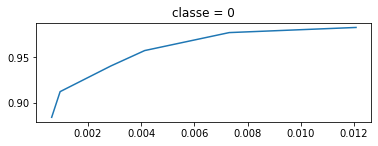

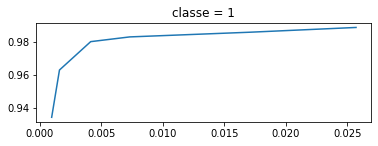

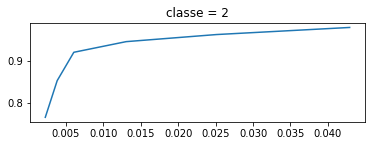

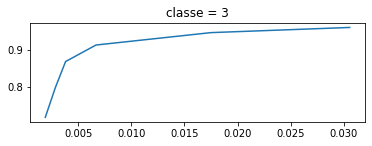

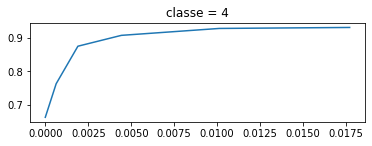

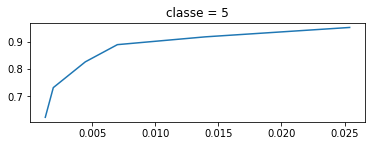

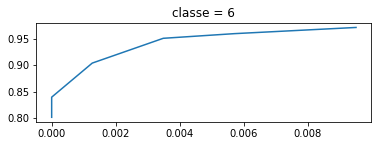

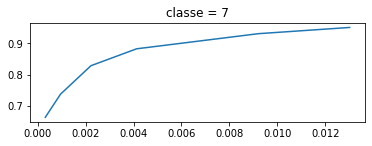

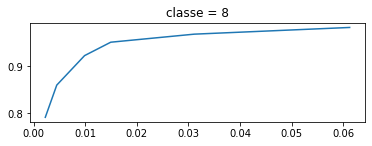

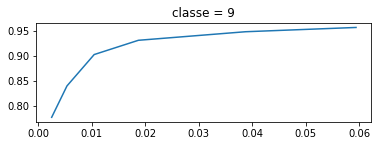

In [ ]:
ROC(vect_classes,seuils, Ytt,prediction_cnn)